###Name: Naveen Jha
###Email: naveenjha.2k4@gmail.com
###Project Name: ClusterQuest  Unveiling Cohorts in Social Networks
**Project Description:** In this project, we aim to build a system capable of automatically analyzing social media networks and identifying and clustering communities that can significantly benefit businesses operating in this space.

In this problem, we aim to build Machine Learning models in order to cluster several social media users together. This is an unsupervised learning problem. We are going to work with a special kind of data called Graph Data.








In [60]:
#install igraph as we will need it in this project
!pip install igraph

### Import Library

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from igraph import Graph
import igraph as ig

#Read data from google drive



In [62]:
"""Used Below code to handle gzip
import gzip
import shutil
with gzip.open('facebook_combined.txt.gz', 'rb') as f_in:
    with open('facebook_combined.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
"""

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
# Read the file into pandas dataframe
file_path = "/content/drive/Othercomputers/My MacBook Pro/official/training/ai-ik/MLminiProjJune24/facebook_combined.txt"
data = pd.read_csv(file_path, sep=" ", header=0, names=["first_node_col", "second_node_col"])
data.head()

,first_node_col,second_node_col
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6


Based on Head information, we can see that there is undirected graph relationship and it gives us information about how one node is connected to other nodes.

###EDA and Feature Engg

In [ ]:
#check the information and any missing values

In [159]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88233 entries, 0 to 88232
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   first_node_col   88233 non-null  int64
 1   second_node_col  88233 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB


first_node_col     0
second_node_col    0
dtype: int64

There are 88233 non null values in first and second column
There are no null values in either of the columns

In [160]:
data.describe()

,first_node_col,second_node_col
count,88233.000000,88233.000000
mean,1864.802908,2154.223533
std,910.275802,893.685198
min,0.000000,2.000000
25%,1160.000000,1600.000000
50%,1983.000000,2259.000000
75%,2423.000000,2631.000000
max,4031.000000,4038.000000


In [161]:
data.shape
data.nunique()

first_node_col     3663
second_node_col    4036
dtype: int64

shape tells us that there are 88233 rows and 2 columns
first column has 3663 unique values and second has 4036 unique value
We dont have scope to drop any columns in this project.

###Creating and anlyzing graph using
######import networkx as nx
######from igraph import Graph



In [162]:
igraph_fb = Graph.Read_Edgelist(file_path, directed=False)

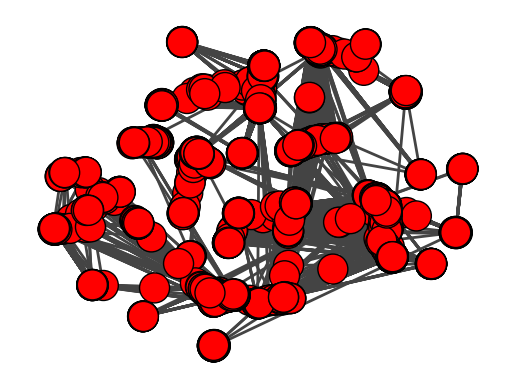

In [163]:
#plotting graph
fig, ax = plt.subplots()
ig.plot(igraph_fb, target=ax)


###EDA and Feature Engg.

In [164]:
from pickle import FALSE
# creating empty dataframe object for node features
feature_df = pd.DataFrame()

# get all the unique nodes by combining first_node_col and second_node_col
feature_df["unique_node"] = np.unique(data[['first_node_col', 'second_node_col']].values)

# Degree can be one of the features for a node - It is number of edges connected to the node
#This information is very useful as in marketing if we want to propagate information quickly,
# then high degree node will be useful. In social network, we can say that celebrities would be having really
# high degree value and its obvious that marketers collaborate with celebrities for paid promotions
# This also gives the node degree for graph ==> node_degree = igraph_fb.degree()
#  below is more readable

node_degree = igraph_fb.degree(feature_df["unique_node"])
#update the feature dataframe with node degree
feature_df["node_degree"] = node_degree
#print(node_degree)

#closeness centrality metric defines the importance of a node in a graph as being measured by
# how close it is to all other nodes in the graph.For a node, it is defined as the sum of the
# geodesic distance between that node to all other nodes in the network.
#The Geodesic distance d between two nodes a and b is defined as the number of edges/links
#between these two nodes on the shortest path(path with minimum number of edges) between them.

#lower the closeness centrality, better the node would be to propagate the information

vertex_closeness = Graph.closeness(igraph_fb)

#“Betweenness Centrality” (BC). This metric defines and measures the
#importance of a node in a network based upon how many times it occurs in the shortest path between all pairs of nodes in a graph.
# High BC , better the node is for transmission, also removal of high BC node can disconnect the graph altogether
vertex_betweenness = igraph_fb.betweenness()

#In general, vertices with high eigenvector centralities are those which are connected to many other vertices which are, in turn, connected to many others (and so on)
eigenvector_centrality = Graph.eigenvector_centrality(igraph_fb, directed= FALSE)

#The eccentricity of a vertex is calculated by measuring the shortest distance from (or to) the vertex, to (or from) all vertices in the graph, and taking the maximum.
eccentricity = Graph.eccentricity(igraph_fb, mode='all')

#The local clustering coefficient of a vertex (node) in a graph quantifies how close its neighbours are to being a clique (complete graph).
cluster_coefficient = igraph_fb.transitivity_local_undirected()

#PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is.
#The underlying assumption is that more important websites are likely to receive more links from other websites
#High page rank means, node is more important
page_rank = igraph_fb.pagerank()

feature_df["page_rank"] = page_rank
feature_df["closeness_centrality"] = vertex_closeness
feature_df["cluster_coefficient"] = cluster_coefficient
feature_df["betweenness_centrality"] = vertex_betweenness
feature_df["eigenvector_centrality"] = eigenvector_centrality
feature_df["eccentricity"] = eccentricity
feature_df.head(5000)

,unique_node,node_degree,page_rank,closeness_centrality,cluster_coefficient,betweenness_centrality,eigenvector_centrality,eccentricity
0,0,347,0.006225,0.353343,0.041962,1.192496e+06,3.472899e-04,6.0
1,1,17,0.000236,0.261376,0.419118,2.268564e+01,6.258107e-06,7.0
2,2,10,0.000199,0.261258,0.888889,6.190476e-01,2.270065e-06,7.0
3,3,17,0.000226,0.261376,0.632353,1.373447e+01,6.875723e-06,7.0
4,4,10,0.000233,0.261258,0.866667,1.500000e+00,2.273515e-06,7.0
...,...,...,...,...,...,...,...,...
4034,4034,2,0.000094,0.183989,1.000000,0.000000e+00,3.071930e-09,8.0
4035,4035,1,0.000068,0.183980,NaN,0.000000e+00,3.032079e-09,8.0
4036,4036,2,0.000106,0.183989,1.000000,0.000000e+00,3.051111e-09,8.0
4037,4037,4,0.000148,0.184005,0.666667,5.833333e-01,3.111359e-09,8.0


In [165]:
# Calculate Mean Neighbour Degree to identify to find the closeness
sub_avgdeg = []
for vertex in igraph_fb.vs:
   # Get the neighbors of the vertex. order=2 limits the subgraph to
   # 2 hop i.e. only immediate neighbors and their immediate
   # neighbors for this node will be considered.
   neighbors_within_2_hops = igraph_fb.neighborhood(vertex, order=2)
   subgraph = igraph_fb.subgraph(neighbors_within_2_hops)

   sub_avgdeg.append(np.array(subgraph.degree()).mean())
   #print(len(sub_avgdeg))
feature_df["Mean Neighbour Degree"] = sub_avgdeg
feature_df.head(500)

,unique_node,node_degree,page_rank,closeness_centrality,cluster_coefficient,betweenness_centrality,eigenvector_centrality,eccentricity,Mean Neighbour Degree
0,0,347,0.006225,0.353343,0.041962,1.192496e+06,3.472899e-04,6.0,44.358130
1,1,17,0.000236,0.261376,0.419118,2.268564e+01,6.258107e-06,7.0,16.471264
2,2,10,0.000199,0.261258,0.888889,6.190476e-01,2.270065e-06,7.0,16.471264
3,3,17,0.000226,0.261376,0.632353,1.373447e+01,6.875723e-06,7.0,16.471264
4,4,10,0.000233,0.261258,0.866667,1.500000e+00,2.273515e-06,7.0,16.471264
...,...,...,...,...,...,...,...,...,...
495,495,23,0.000177,0.270789,0.612648,7.110353e+00,1.067783e-05,6.0,30.795181
496,496,40,0.000287,0.277411,0.511538,3.301945e+02,1.858491e-05,6.0,31.395085
497,497,83,0.000540,0.310210,0.393770,4.607139e+03,7.057161e-05,5.0,31.864407
498,498,6,0.000139,0.270408,0.466667,7.981283e+00,1.584671e-06,6.0,30.906122


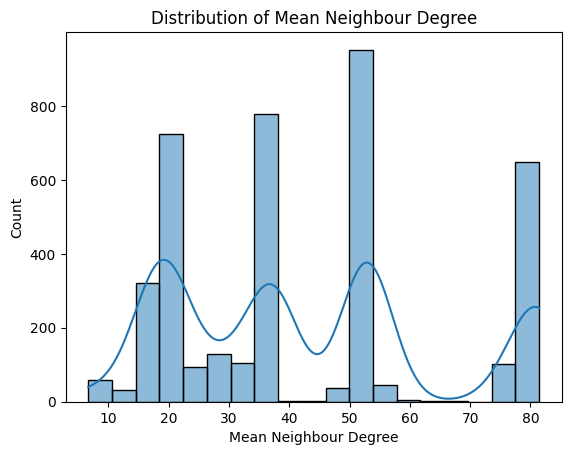

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4039 entries, 0 to 4038
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_node             4039 non-null   int64  
 1   node_degree             4039 non-null   int64  
 2   page_rank               4039 non-null   float64
 3   closeness_centrality    4039 non-null   float64
 4   cluster_coefficient     3964 non-null   float64
 5   betweenness_centrality  4039 non-null   float64
 6   eigenvector_centrality  4039 non-null   float64
 7   eccentricity            4039 non-null   float64
 8   Mean Neighbour Degree   4039 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 284.1 KB


In [166]:
# Plot the distribution of Mean Neighnour Degree
sns.histplot(feature_df['Mean Neighbour Degree'], kde=True)
plt.title("Distribution of Mean Neighbour Degree")
plt.xlabel("Mean Neighbour Degree")
plt.show()
feature_df.info()

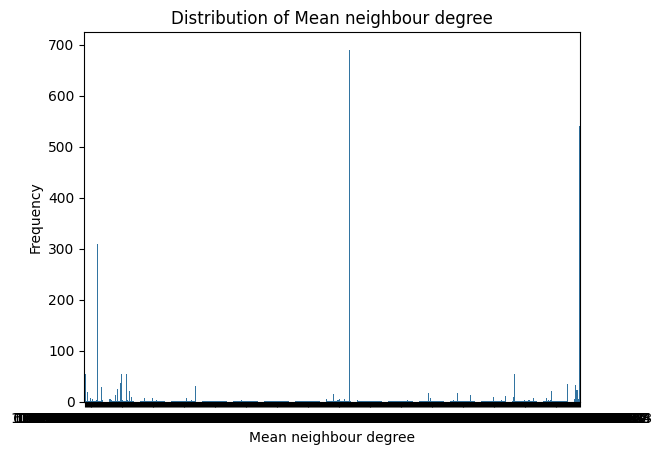

In [15]:
# Plot the count plot  of Mean Neighbour Degree
sns.countplot(x=feature_df['Mean Neighbour Degree'])
plt.title("Distribution of Mean neighbour degree")
plt.xlabel("Mean neighbour degree")
plt.ylabel("Frequency")
plt.show()

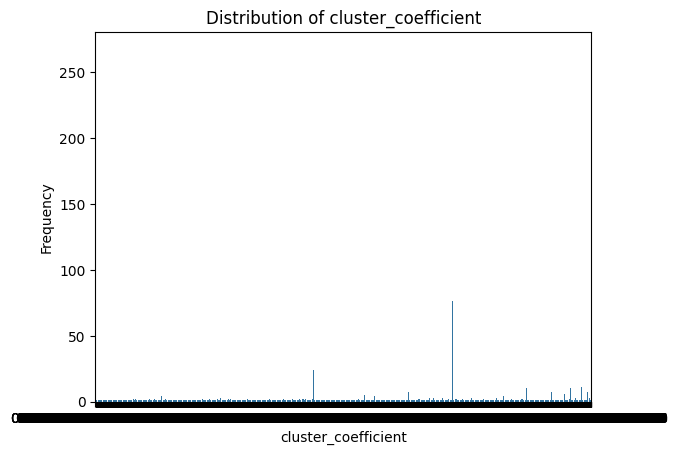

In [ ]:
sns.countplot(x=feature_df['cluster_coefficient'])
plt.title("Distribution of cluster_coefficient")
plt.xlabel("cluster_coefficient")
plt.ylabel("Frequency")
plt.show()

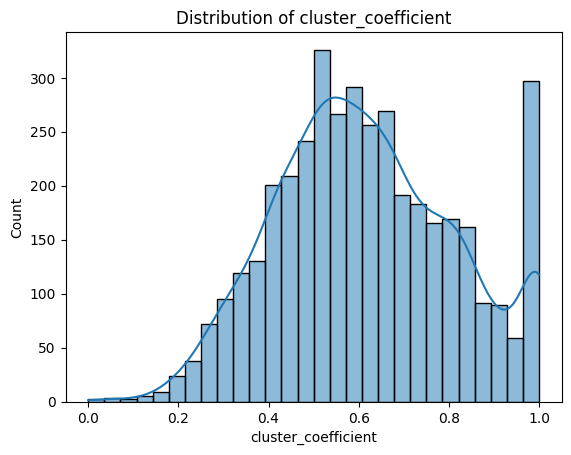

In [16]:
sns.histplot(feature_df['cluster_coefficient'], kde=True)
plt.title("Distribution of cluster_coefficient")
plt.xlabel("cluster_coefficient")
plt.show()

In [156]:
feature_df.info()
# We found that there are 75 null values
feature_df["cluster_coefficient"].isna().sum()
# We can use mean to handle the null values
feature_df['cluster_coefficient'] = feature_df['cluster_coefficient'].fillna(feature_df['cluster_coefficient'].mean())
#feature_df = feature_df.dropna()
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4039 entries, 0 to 4038
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_node             4039 non-null   int64  
 1   node_degree             4039 non-null   int64  
 2   page_rank               4039 non-null   float64
 3   closeness_centrality    4039 non-null   float64
 4   cluster_coefficient     4039 non-null   float64
 5   betweenness_centrality  4039 non-null   float64
 6   eigenvector_centrality  4039 non-null   float64
 7   eccentricity            4039 non-null   float64
 8   Mean Neighbour Degree   4039 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 284.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4039 entries, 0 to 4038
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_node             4039 non-null   in

In [135]:
#Z-score indicates how much a given value differs from the standard deviation
 # We can Calculate z score to remove outliers based of deviation

from scipy import stats

z = np.abs(stats.zscore(feature_df[['node_degree', 'page_rank', 'closeness_centrality', 'cluster_coefficient', 'betweenness_centrality',
       'Mean Neighbour Degree', 'eigenvector_centrality', 'eccentricity']]))
print(z)

# Z score > 2 or 3 seems to be good threshhold to remove outliers
# Baserd on analysis, I am removing input which has z score > 3
feature_df_outliers_removed = feature_df[(z<2).all(axis=1)]
feature_df_outliers_removed


      node_degree  page_rank  closeness_centrality  cluster_coefficient  \
0        5.786781  23.172497              2.136649         2.910167e+00   
1        0.509233   0.045715              0.409518         1.001460e+00   
2        0.642785   0.187093              0.412795         1.375953e+00   
3        0.509233   0.081848              0.409518         7.767860e-02   
4        0.642785   0.057050              0.412795         1.263491e+00   
...           ...        ...                   ...                  ...   
4034     0.795416   0.596944              2.552051         1.938263e+00   
4035     0.814495   0.695430              2.552283         5.618605e-16   
4036     0.795416   0.549742              2.552051         1.938263e+00   
4037     0.757258   0.386159              2.551587         2.513331e-01   
4038     0.661864   0.181929              2.550426         3.109768e-01   

      betweenness_centrality  Mean Neighbour Degree  eigenvector_centrality  \
0                  1

,unique_node,node_degree,page_rank,closeness_centrality,cluster_coefficient,betweenness_centrality,eigenvector_centrality,eccentricity,Mean Neighbour Degree
1,1,17,0.000236,0.261376,0.419118,22.685643,6.258107e-06,7.0,16.471264
2,2,10,0.000199,0.261258,0.888889,0.619048,2.270065e-06,7.0,16.471264
3,3,17,0.000226,0.261376,0.632353,13.734470,6.875723e-06,7.0,16.471264
4,4,10,0.000233,0.261258,0.866667,1.500000,2.273515e-06,7.0,16.471264
5,5,13,0.000202,0.261308,0.333333,17.980159,1.232637e-05,7.0,16.471264
...,...,...,...,...,...,...,...,...,...
3978,3978,4,0.000079,0.239261,0.666667,1.000000,5.948884e-09,6.0,19.562044
3979,3979,12,0.000192,0.239374,0.515152,8.620635,7.595471e-09,6.0,19.562044
3989,3989,6,0.000213,0.224783,0.466667,3981.666667,4.882478e-07,7.0,6.687500
4011,4011,4,0.000147,0.224758,0.833333,0.166667,4.910691e-07,7.0,6.687500


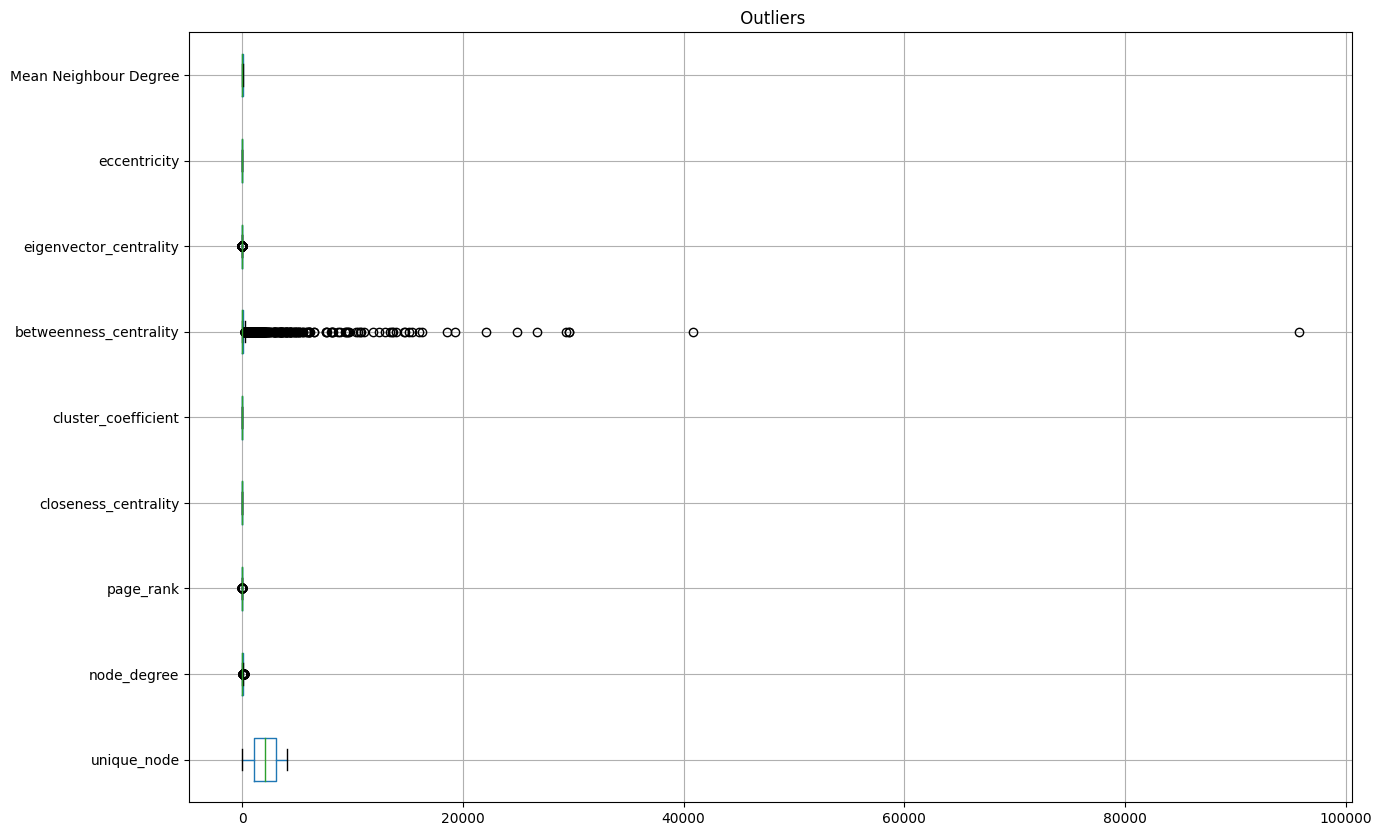

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize =(15,10))
# Using boxplot to further remove outliers
feature_df_outliers_removed.boxplot(vert = 0)
plt.title(' Outliers');



,unique_node,page_rank,closeness_centrality,cluster_coefficient,eigenvector_centrality,eccentricity,Mean Neighbour Degree
1,1,0.000236,0.261376,0.419118,6.258107e-06,7.0,16.471264
2,2,0.000199,0.261258,0.888889,2.270065e-06,7.0,16.471264
3,3,0.000226,0.261376,0.632353,6.875723e-06,7.0,16.471264
4,4,0.000233,0.261258,0.866667,2.273515e-06,7.0,16.471264
5,5,0.000202,0.261308,0.333333,1.232637e-05,7.0,16.471264
...,...,...,...,...,...,...,...
3978,3978,0.000079,0.239261,0.666667,5.948884e-09,6.0,19.562044
3979,3979,0.000192,0.239374,0.515152,7.595471e-09,6.0,19.562044
3989,3989,0.000213,0.224783,0.466667,4.882478e-07,7.0,6.687500
4011,4011,0.000147,0.224758,0.833333,4.910691e-07,7.0,6.687500


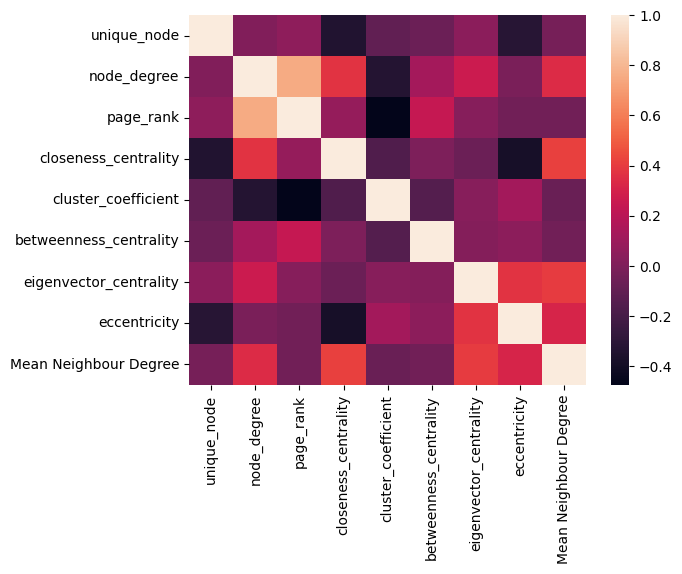

In [137]:
# find correlation between attributes
#import matplotlib.pyplot as plt

#plt.matshow(feature_df_outliers_removed.corr())
#plt.show()

#import seaborn as sns
corr = feature_df_outliers_removed.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# page rank and node degree are highly correlated so can remove node degree from feature set
feature_df_outliers_removed = feature_df_outliers_removed.drop('node_degree', axis = 1)
feature_df_outliers_removed = feature_df_outliers_removed.drop('betweenness_centrality', axis = 1)
feature_df_outliers_removed


In [138]:
# Use scalar to scale data before applying algorithm


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = feature_df_outliers_removed.drop('unique_node',axis =1)
Y = feature_df_outliers_removed['unique_node']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# try PCA

#pca = PCA(n_components=0.8, random_state=123).fit(X_scaled)
#X_scaled_df = pca.transform(X_scaled)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df
#X_scaled_df.shape[1]

,page_rank,closeness_centrality,cluster_coefficient,eigenvector_centrality,eccentricity,Mean Neighbour Degree
0,0.102513,-0.648333,-1.033796,-0.224125,1.642706,-1.234055
1,-0.201921,-0.652486,1.405184,-0.224313,1.642706,-1.234055
2,0.024707,-0.648333,0.073289,-0.224096,1.642706,-1.234055
3,0.078105,-0.652486,1.289809,-0.224313,1.642706,-1.234055
4,-0.177192,-0.650707,-1.479175,-0.223840,1.642706,-1.234055
...,...,...,...,...,...,...
3405,-1.204457,-1.424169,0.251440,-0.224419,-0.608752,-1.086139
3406,-0.259667,-1.420188,-0.535203,-0.224419,-0.608752,-1.086139
3407,-0.083639,-1.932057,-0.786929,-0.224397,1.642706,-1.702277
3408,-0.636456,-1.932935,1.116748,-0.224396,1.642706,-1.702277


In [139]:
#using k means algorithm which is based on centroid to identify clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=3, max_iter=5000, random_state=123)
kmeans.fit(X_scaled_df)
#kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=5000, n_clusters=3, random_state=123)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

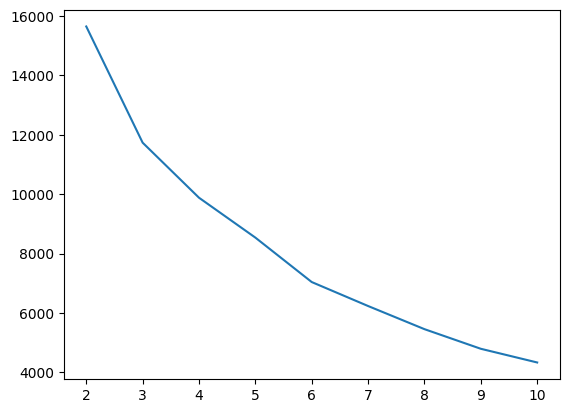

In [142]:
# elbow-curve/SSD to find optimum number of clustering
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=5000, random_state=123)
    kmeans.fit(X_scaled_df)
    #Inertia measures how well a dataset was clustered by K-Means.
    #It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters, ssd)

We can see that elbow occurs at 6 which represent that optimum number of clusters is 6

In [143]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=5000)
    kmeans.fit(X_scaled_df)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.3822174558357732


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.3302169494662553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.3045794194500229


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.33295162284900087


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.3405946109584693


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.34099591670920754


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.3383430436639699


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9, the silhouette score is 0.34141645936420095


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, the silhouette score is 0.34285238128682105


We can see that using silhoutte score the optimum number of cluster is 8 using silhoutte score.

In [148]:
# final model with k=6
kmeans = KMeans(n_clusters=6, max_iter=1000, random_state=123)
kmeans.fit(X_scaled_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=6, random_state=123)

In [149]:


X_scaled_df['K_Means_Cluster_ID'] = kmeans.labels_
X_scaled_df

,page_rank,closeness_centrality,cluster_coefficient,eigenvector_centrality,eccentricity,Mean Neighbour Degree,K_Means_Cluster_ID
0,0.102513,-0.648333,-1.033796,-0.224125,1.642706,-1.234055,3
1,-0.201921,-0.652486,1.405184,-0.224313,1.642706,-1.234055,3
2,0.024707,-0.648333,0.073289,-0.224096,1.642706,-1.234055,3
3,0.078105,-0.652486,1.289809,-0.224313,1.642706,-1.234055,3
4,-0.177192,-0.650707,-1.479175,-0.223840,1.642706,-1.234055,3
...,...,...,...,...,...,...,...
3405,-1.204457,-1.424169,0.251440,-0.224419,-0.608752,-1.086139,5
3406,-0.259667,-1.420188,-0.535203,-0.224419,-0.608752,-1.086139,5
3407,-0.083639,-1.932057,-0.786929,-0.224397,1.642706,-1.702277,3
3408,-0.636456,-1.932935,1.116748,-0.224396,1.642706,-1.702277,3


<Axes: xlabel='page_rank', ylabel='cluster_coefficient'>

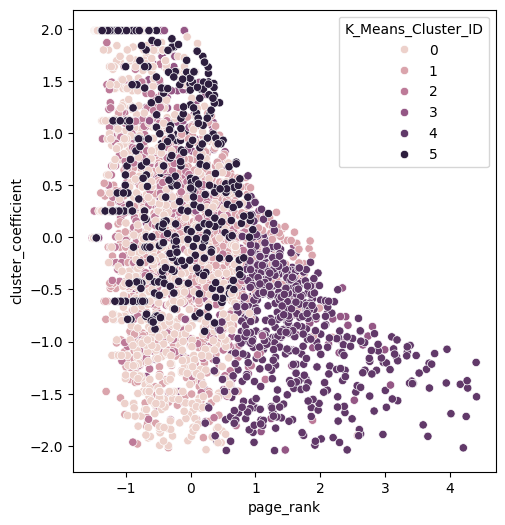

In [150]:
plt.figure(figsize=(12,6),dpi=100)

plt.subplot(1,2,1)
sns.scatterplot(x='page_rank',y='cluster_coefficient',data=X_scaled_df,hue='K_Means_Cluster_ID')

In [ ]:
# Trying few other algorithm, but looks like K means is better.
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan.fit(X_scaled_df)

DBSCAN(eps=10)

Hierarchical:  0.48819596741685795


<Axes: xlabel='page_rank', ylabel='cluster_coefficient'>

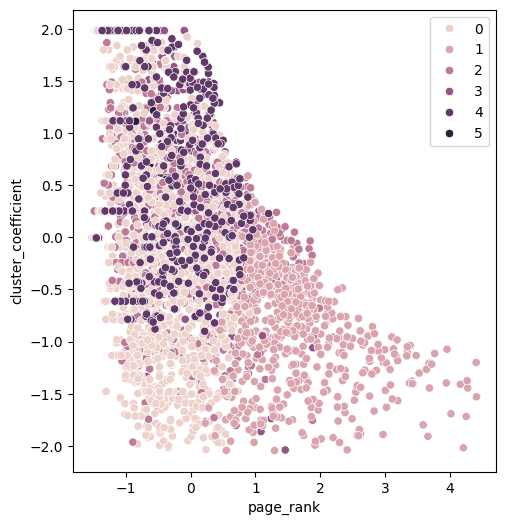

In [155]:
# Solution
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
ag = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X_scaled_df)
print("Hierarchical: ", silhouette_score(X_scaled_df, ag.labels_, metric='euclidean'))
labels = ag.fit_predict(X_scaled_df)
plt.figure(figsize=(12,6),dpi=100)

plt.subplot(1,2,1)
sns.scatterplot(x='page_rank',y='cluster_coefficient',data=X_scaled_df,hue=labels)

